# Business Analytics Practicum I

### Loukopoulos Orestis | f2822104 | Full-Time 2021 - 2022

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### We will load the data set and have a quick insight on our data

In [335]:
weather = pd.read_csv('Weather.csv')
weather

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.00,NaN,NaN,65.0,50.0
1,GR000016716,"HELLINIKON, GR",1955-01-02,0.08,NaN,NaN,58.0,45.0
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.00,NaN,NaN,60.0,49.0
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.00,NaN,NaN,66.0,45.0
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.00,NaN,NaN,64.0,47.0
...,...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.00,NaN,62.0,NaN,NaN
23247,GR000016716,"HELLINIKON, GR",2020-12-28,0.26,NaN,59.0,65.0,53.0
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.00,NaN,61.0,68.0,54.0
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.00,NaN,62.0,68.0,59.0


In [336]:
print(weather.STATION.unique())
print(len(weather.STATION.unique()))

['GR000016716']
1


In [337]:
print(weather.NAME.unique())
print(len(weather.NAME.unique()))

['HELLINIKON, GR']
1


In [338]:
print(weather.shape)
print(weather['PRCP'].isna().sum()) #478 NAs
print(weather['SNWD'].isna().sum()) #So in SWND  99% of the values are NAs
print(weather['TAVG'].isna().sum()) #2311 NAs
print(weather['TMAX'].isna().sum()) #944 NAs
print(weather['TMIN'].isna().sum()) #833 NAs

(23251, 8)
478
23221
2311
944
833


#### Drop columns Station and Name as they do not offer any additional information on our analysis. They have the same value in every observation. Also, drop the SNWD column, as the aim of this assignment is to concentrate on the average daily temperature and precipitation.

In [339]:
weather=weather.loc[:,['DATE','PRCP','TAVG','TMAX','TMIN']]
weather

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.00,NaN,65.0,50.0
1,1955-01-02,0.08,NaN,58.0,45.0
2,1955-01-03,0.00,NaN,60.0,49.0
3,1955-01-04,0.00,NaN,66.0,45.0
4,1955-01-05,0.00,NaN,64.0,47.0
...,...,...,...,...,...
23246,2020-12-27,0.00,62.0,NaN,NaN
23247,2020-12-28,0.26,59.0,65.0,53.0
23248,2020-12-29,0.00,61.0,68.0,54.0
23249,2020-12-30,0.00,62.0,68.0,59.0


### We will find the missing values in date range 1/1/1955 to 31/12/2020. We will fill the missing values of this data set by using a new data set which covers only the period from 2010 - 2019

In [340]:
weather=weather.set_index('DATE')
weather

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1955-01-01,0.00,NaN,65.0,50.0
1955-01-02,0.08,NaN,58.0,45.0
1955-01-03,0.00,NaN,60.0,49.0
1955-01-04,0.00,NaN,66.0,45.0
1955-01-05,0.00,NaN,64.0,47.0
...,...,...,...,...
2020-12-27,0.00,62.0,NaN,NaN
2020-12-28,0.26,59.0,65.0,53.0
2020-12-29,0.00,61.0,68.0,54.0


In [341]:
weather.index = pd.to_datetime(weather.index)

In [342]:
missing_dates = pd.date_range(start = '1955-01-01', end = '2020-12-31').difference(weather.index)
print(len(pd.date_range(start = '1955-01-01', end = '2020-12-31').difference(weather.index)))

856


In [343]:
missing_dates

DatetimeIndex(['2006-01-31', '2006-02-03', '2007-08-28', '2012-05-26',
               '2012-05-27', '2012-05-28', '2012-05-31', '2012-06-01',
               '2012-06-02', '2012-06-03',
               ...
               '2017-09-10', '2017-09-20', '2017-09-21', '2017-09-23',
               '2017-09-27', '2017-10-02', '2017-10-08', '2017-10-15',
               '2017-10-27', '2018-09-17'],
              dtype='datetime64[ns]', length=856, freq=None)

In [344]:
weather.reset_index(level=0, inplace=True)
weather

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.00,NaN,65.0,50.0
1,1955-01-02,0.08,NaN,58.0,45.0
2,1955-01-03,0.00,NaN,60.0,49.0
3,1955-01-04,0.00,NaN,66.0,45.0
4,1955-01-05,0.00,NaN,64.0,47.0
...,...,...,...,...,...
23246,2020-12-27,0.00,62.0,NaN,NaN
23247,2020-12-28,0.26,59.0,65.0,53.0
23248,2020-12-29,0.00,61.0,68.0,54.0
23249,2020-12-30,0.00,62.0,68.0,59.0


In [345]:
md = pd.DataFrame(missing_dates, columns=['DATE'])
md

,DATE
0,2006-01-31
1,2006-02-03
2,2007-08-28
3,2012-05-26
4,2012-05-27
...,...
851,2017-10-02
852,2017-10-08
853,2017-10-15
854,2017-10-27


### We will add the missing dates in our data set.

In [346]:
weather=pd.concat([md, weather])
weather

,DATE,PRCP,TAVG,TMAX,TMIN
0,2006-01-31,NaN,NaN,NaN,NaN
1,2006-02-03,NaN,NaN,NaN,NaN
2,2007-08-28,NaN,NaN,NaN,NaN
3,2012-05-26,NaN,NaN,NaN,NaN
4,2012-05-27,NaN,NaN,NaN,NaN
...,...,...,...,...,...
23246,2020-12-27,0.00,62.0,NaN,NaN
23247,2020-12-28,0.26,59.0,65.0,53.0
23248,2020-12-29,0.00,61.0,68.0,54.0
23249,2020-12-30,0.00,62.0,68.0,59.0


In [347]:
pd.to_datetime(weather.DATE)
weather = weather.sort_values(by='DATE')
weather

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.00,NaN,65.0,50.0
1,1955-01-02,0.08,NaN,58.0,45.0
2,1955-01-03,0.00,NaN,60.0,49.0
3,1955-01-04,0.00,NaN,66.0,45.0
4,1955-01-05,0.00,NaN,64.0,47.0
...,...,...,...,...,...
23246,2020-12-27,0.00,62.0,NaN,NaN
23247,2020-12-28,0.26,59.0,65.0,53.0
23248,2020-12-29,0.00,61.0,68.0,54.0
23249,2020-12-30,0.00,62.0,68.0,59.0


### We will convert the temperature units from Fahrenheit to Celcius

In [348]:
weather['TAVG'] = ((weather['TAVG']-32)/1.8).round(1)
weather['TMAX'] = ((weather['TMAX']-32)/1.8).round(1)
weather['TMIN'] = ((weather['TMIN']-32)/1.8).round(1)

### We will convert the rainfall units from inches to mm

In [349]:
weather['PRCP'] = (weather['PRCP']*25.4).round(2)
weather

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.00,NaN,18.3,10.0
1,1955-01-02,2.03,NaN,14.4,7.2
2,1955-01-03,0.00,NaN,15.6,9.4
3,1955-01-04,0.00,NaN,18.9,7.2
4,1955-01-05,0.00,NaN,17.8,8.3
...,...,...,...,...,...
23246,2020-12-27,0.00,16.7,NaN,NaN
23247,2020-12-28,6.60,15.0,18.3,11.7
23248,2020-12-29,0.00,16.1,20.0,12.2
23249,2020-12-30,0.00,16.7,20.0,15.0


# **Working with an alternative dataset**
### We will use an alternative data set in order to fill missing values on our primary data set. We have to mention that this data set contains data from 1/1/2010 to 31/12/2019

In [350]:
athens=pd.read_csv('athens.csv', header=None)
athens

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


In [351]:
athens = athens.rename({0: 'DATE', 
                        1: 'TAVG2', 2: 'TMAX2', 3: 'TMIN2', 
                        4: 'HAVG', 5: 'HMAX', 6: 'HMIN', 
                        7: 'PAVG', 8: 'PMAX', 9: 'PMIN',
                       10: 'PRCP2', 11: 'WINDSPEED', 12: 'WIND_DIRECTION', 13: 'WIND_GUST'}, axis=1)
athens

,DATE,TAVG2,TMAX2,TMIN2,HAVG,HMAX,HMIN,PAVG,PMAX,PMIN,PRCP2,WINDSPEED,WIND_DIRECTION,WIND_GUST
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


### We will only take the columns that have values which will help us fill the NAs of the other data set.

In [352]:
athens=athens.loc[:,['DATE', 'PRCP2', 'TAVG2', 'TMAX2', 'TMIN2']]
athens

,DATE,PRCP2,TAVG2,TMAX2,TMIN2
0,2010-01-01,0.2,17.9,18.1,17.8
1,2010-01-02,0.0,15.6,15.7,15.5
2,2010-01-03,0.0,13.5,13.6,13.4
3,2010-01-04,0.0,9.5,9.6,9.5
4,2010-01-05,0.0,13.4,13.5,13.4
...,...,...,...,...,...
3647,2019-12-27,0.0,10.1,10.2,10.0
3648,2019-12-28,7.2,8.3,8.4,8.2
3649,2019-12-29,3.4,6.4,6.5,6.4
3650,2019-12-30,12.4,4.0,4.0,3.9


In [353]:
athens=athens.set_index('DATE')
athens

,PRCP2,TAVG2,TMAX2,TMIN2
DATE,,,,
2010-01-01,0.2,17.9,18.1,17.8
2010-01-02,0.0,15.6,15.7,15.5
2010-01-03,0.0,13.5,13.6,13.4
2010-01-04,0.0,9.5,9.6,9.5
2010-01-05,0.0,13.4,13.5,13.4
...,...,...,...,...
2019-12-27,0.0,10.1,10.2,10.0
2019-12-28,7.2,8.3,8.4,8.2
2019-12-29,3.4,6.4,6.5,6.4


In [354]:
athens.index = pd.to_datetime(athens.index)

### Check for missing values and missing dates.

In [355]:
print(athens.isna().sum())
print(len(pd.date_range(start = '2010-01-01', end = '2019-12-31').difference(athens.index)))

PRCP2    0
TAVG2    0
TMAX2    0
TMIN2    0
dtype: int64
0


In [356]:
athens.reset_index(level=0, inplace=True)
athens

,DATE,PRCP2,TAVG2,TMAX2,TMIN2
0,2010-01-01,0.2,17.9,18.1,17.8
1,2010-01-02,0.0,15.6,15.7,15.5
2,2010-01-03,0.0,13.5,13.6,13.4
3,2010-01-04,0.0,9.5,9.6,9.5
4,2010-01-05,0.0,13.4,13.5,13.4
...,...,...,...,...,...
3647,2019-12-27,0.0,10.1,10.2,10.0
3648,2019-12-28,7.2,8.3,8.4,8.2
3649,2019-12-29,3.4,6.4,6.5,6.4
3650,2019-12-30,12.4,4.0,4.0,3.9


In [357]:
athens.dtypes

DATE     datetime64[ns]
PRCP2           float64
TAVG2            object
TMAX2            object
TMIN2            object
dtype: object

### I executed the following:
`athens[['TAVG2',' TMAX2', 'TMIN2']] = athens[['TAVG2', 'TMAX2', 'TMIN2']].apply(pd.to_numeric)` 

After executing the above I got an error and I saw that these columns cannnot be converted into numeric type as they contained some values that are not numbers (e.g. --- :This value was first found in line 514).

In [358]:
athens.iloc[514]

DATE     2011-05-30 00:00:00
PRCP2                   11.6
TAVG2                    ---
TMAX2                    ---
TMIN2                    ---
Name: 514, dtype: object

In [359]:
athens[(athens['TAVG2']=='---') | (athens['TMAX2']=='---') | (athens['TMIN2']=='---') ]

,DATE,PRCP2,TAVG2,TMAX2,TMIN2
514,2011-05-30,11.6,---,---,---
1235,2013-05-20,0.0,---,---,---
2012,2015-07-06,0.0,---,---,---


In [360]:
athens.loc[athens['TAVG2']=='---',['TAVG2']] = None
athens.loc[athens['TMAX2']=='---',['TMAX2']] = None
athens.loc[athens['TMIN2']=='---',['TMIN2']] = None

### After setting those values equal to NA, I was able to convert the columns to numeric.

In [361]:
athens[['TAVG2','TMAX2','TMIN2']]=athens[['TAVG2','TMAX2','TMIN2']].apply(pd.to_numeric)

## Merging the two data frames

In [362]:
new_df = pd.merge(weather, athens, on='DATE', how='left')
new_df

,DATE,PRCP,TAVG,TMAX,TMIN,PRCP2,TAVG2,TMAX2,TMIN2
0,1955-01-01,0.00,NaN,18.3,10.0,NaN,NaN,NaN,NaN
1,1955-01-02,2.03,NaN,14.4,7.2,NaN,NaN,NaN,NaN
2,1955-01-03,0.00,NaN,15.6,9.4,NaN,NaN,NaN,NaN
3,1955-01-04,0.00,NaN,18.9,7.2,NaN,NaN,NaN,NaN
4,1955-01-05,0.00,NaN,17.8,8.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
24102,2020-12-27,0.00,16.7,NaN,NaN,NaN,NaN,NaN,NaN
24103,2020-12-28,6.60,15.0,18.3,11.7,NaN,NaN,NaN,NaN
24104,2020-12-29,0.00,16.1,20.0,12.2,NaN,NaN,NaN,NaN
24105,2020-12-30,0.00,16.7,20.0,15.0,NaN,NaN,NaN,NaN


In [363]:
new_df.isna().sum()

DATE         0
PRCP      1334
TAVG      3167
TMAX      1800
TMIN      1689
PRCP2    20455
TAVG2    20458
TMAX2    20458
TMIN2    20458
dtype: int64

In [364]:
new_df.loc[new_df['TAVG'].isna()==True,['TAVG']] = new_df['TAVG2']
new_df.loc[new_df['TMAX'].isna()==True,['TMAX']] = new_df['TMAX2']
new_df.loc[new_df['TMIN'].isna()==True,['TMIN']] = new_df['TMIN']
new_df.loc[new_df['PRCP'].isna()==True,['PRCP']] = new_df['PRCP2']

new_df

,DATE,PRCP,TAVG,TMAX,TMIN,PRCP2,TAVG2,TMAX2,TMIN2
0,1955-01-01,0.00,NaN,18.3,10.0,NaN,NaN,NaN,NaN
1,1955-01-02,2.03,NaN,14.4,7.2,NaN,NaN,NaN,NaN
2,1955-01-03,0.00,NaN,15.6,9.4,NaN,NaN,NaN,NaN
3,1955-01-04,0.00,NaN,18.9,7.2,NaN,NaN,NaN,NaN
4,1955-01-05,0.00,NaN,17.8,8.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
24102,2020-12-27,0.00,16.7,NaN,NaN,NaN,NaN,NaN,NaN
24103,2020-12-28,6.60,15.0,18.3,11.7,NaN,NaN,NaN,NaN
24104,2020-12-29,0.00,16.1,20.0,12.2,NaN,NaN,NaN,NaN
24105,2020-12-30,0.00,16.7,20.0,15.0,NaN,NaN,NaN,NaN


In [365]:
new_df.isna().sum()

DATE         0
PRCP       379
TAVG      2315
TMAX       128
TMIN      1689
PRCP2    20455
TAVG2    20458
TMAX2    20458
TMIN2    20458
dtype: int64

In [366]:
weather=new_df.loc[:,['DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN']]
weather

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.00,NaN,18.3,10.0
1,1955-01-02,2.03,NaN,14.4,7.2
2,1955-01-03,0.00,NaN,15.6,9.4
3,1955-01-04,0.00,NaN,18.9,7.2
4,1955-01-05,0.00,NaN,17.8,8.3
...,...,...,...,...,...
24102,2020-12-27,0.00,16.7,NaN,NaN
24103,2020-12-28,6.60,15.0,18.3,11.7
24104,2020-12-29,0.00,16.1,20.0,12.2
24105,2020-12-30,0.00,16.7,20.0,15.0


# Question 2: Deviation of Summer Temperatures

## Defining a new data frame `q2`
The new data frame will contain informations about mean summer temperature from 1974 to 1999.

In [367]:
plt.style.use('ggplot')

In [368]:
q2 = weather.loc[(weather.DATE.dt.year>=1974) & (weather.DATE.dt.year<=1999) & (weather.DATE.dt.month>=6) & (weather.DATE.dt.month<=8)]
q2 = q2.loc[:,['DATE', 'TAVG']]
q2

,DATE,TAVG
7091,1974-06-01,22.8
7092,1974-06-02,23.3
7093,1974-06-03,22.2
7094,1974-06-04,21.1
7095,1974-06-05,23.9
...,...,...
16309,1999-08-27,24.4
16310,1999-08-28,24.4
16311,1999-08-29,25.6
16312,1999-08-30,26.1


### We calculated the `baseline`.

In [369]:
baseline = q2.TAVG.mean()
baseline

26.228541492036918

## Defining new data frame `all_years`
The data frame `all_years` contains informations about mean summer temperature from 1955 to 2020.

In [370]:
all_years = weather.loc[(weather.DATE.dt.month>=6) & (weather.DATE.dt.month<=8)]
all_years = all_years.loc[:,['DATE', 'TAVG']]
all_years

,DATE,TAVG
151,1955-06-01,NaN
152,1955-06-02,NaN
153,1955-06-03,NaN
154,1955-06-04,NaN
155,1955-06-05,NaN
...,...,...
23980,2020-08-27,28.3
23981,2020-08-28,29.4
23982,2020-08-29,29.4
23983,2020-08-30,27.8


### We grouped by year.

In [371]:
yearly = all_years.groupby(all_years.DATE.dt.isocalendar().year)
len(yearly)

66

In [372]:
x_all = yearly.size()
x_all.index

Index([1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020],
      dtype='object', name='year')

In [373]:
y_all = yearly.TAVG.mean()
y_all

year
1955          NaN
1956          NaN
1957    28.103226
1958    27.042391
1959          NaN
          ...    
2016    28.177174
2017    28.081522
2018    27.403261
2019    28.013043
2020    27.370652
Name: TAVG, Length: 66, dtype: float64

### Calculated rolling average for 10 years.

In [374]:
roll = y_all.rolling(10, min_periods=1).mean()

### Calculated the diffrence (`dif`) of every year's summer average temperature from the baseline.

In [375]:
dif = y_all.values-baseline
dif 

array([        nan,         nan,  1.87468431,  0.81384981,         nan,
               nan,  0.3866759 ,  1.27689329,  1.37365631,  0.09102373,
        0.28015416,  0.7866759 ,  0.49319764, -0.53941106, -0.87962845,
       -0.08348655,         nan,         nan, -0.13506323,  0.27610967,
       -0.29375888, -1.38397627,  0.34537155, -0.48397627, -0.09701975,
       -0.65897627, -0.68723714, -1.19375888, -1.87201975, -1.90788932,
       -0.24158497,  0.61928459, -0.33288932,  0.68993677, -0.11441106,
        0.39319764, -0.14701975, -0.20571541,  0.54971938,  0.93124112,
        0.87037155,  1.10298025,  0.20624112,  1.90732807,  1.74645851,
        1.58124112,  1.47037155,  1.23884981,  1.89211068,  0.39537155,
        0.56711068,  0.79319764,  1.99453543,  1.94102373,  1.14319764,
        1.73341503,  2.84754546,  3.69537155,  1.74428459,  1.39428459,
        1.06602373,  1.94863242,  1.85298025,  1.17471938,  1.78450199,
        1.14211068])

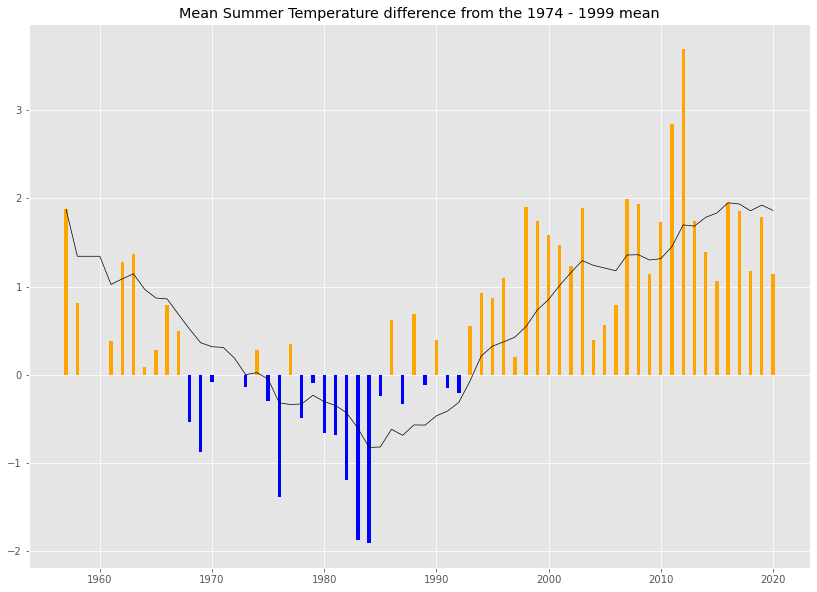

In [376]:
plt.figure(figsize=(14, 10))

plt.bar(x_all[dif>0].index, dif[dif>0], bottom=0, width=0.3, color='orange')
plt.bar(x_all[dif<0].index, dif[dif<0], bottom=0, width=0.3, color='blue')        
plt.plot(x_all.index, roll-baseline, linewidth=0.7 ,color='black')
plt.title('Mean Summer Temperature difference from the 1974 - 1999 mean')
plt.savefig("PLOT1.png",format='png',dpi=85) #to save the plot as png

# Interpretation

From the above graph, we can see the summer average mean temperature anomalies in Greece from 1957 to 2020. We can see that from 1957 to 1968 the summer mean temperature remained higher than 1974 - 1999 summer mean, while from 1968 to 1992 the summer mean temperature remained relatively low except the years 1974, 1977, 1986, 1988 and 1990 which had mean summer temperature higher than 1974 - 1999 summer mean. Furthermore, the mean temperature started to rise from 1992 and then. The peak was recorded in 2012, which was the warmest summer ever from 1957 to 2020. 


# Question 3: Evolution of Daily Temperatures

### Defining a new data frame `q3`
The new data frame will contain informations about mean temperature from 1955 to 2020.

In [377]:
q3 = weather.loc[:,['DATE','TAVG']]
q3

,DATE,TAVG
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN
3,1955-01-04,NaN
4,1955-01-05,NaN
...,...,...
24102,2020-12-27,16.7
24103,2020-12-28,15.0
24104,2020-12-29,16.1
24105,2020-12-30,16.7


### We will add a new column (`roll2`)  in our new datat frame `q3`, which will contain the 30 day rolling average for every day from 1955 to 2020.

In [378]:
q3['roll2'] = q3.TAVG.rolling(30, min_periods=1).mean()
q3

,DATE,TAVG,roll2
0,1955-01-01,NaN,NaN
1,1955-01-02,NaN,NaN
2,1955-01-03,NaN,NaN
3,1955-01-04,NaN,NaN
4,1955-01-05,NaN,NaN
...,...,...,...
24102,2020-12-27,16.7,14.086667
24103,2020-12-28,15.0,14.160000
24104,2020-12-29,16.1,14.160000
24105,2020-12-30,16.7,14.216667


### We defined a new dataframe `q33`, which contains data from 1974 to 1999 and will help us calculate the rolling average for the baseline period of 1974-1999.

In [379]:
q33 = weather.loc[(weather.DATE.dt.year>=1974) & (weather.DATE.dt.year<=1999)]
q33 = q33.loc[:,['DATE', 'TAVG']]
q33

,DATE,TAVG
6940,1974-01-01,11.7
6941,1974-01-02,13.9
6942,1974-01-03,12.2
6943,1974-01-04,10.6
6944,1974-01-05,9.4
...,...,...
16431,1999-12-27,15.6
16432,1999-12-28,16.7
16433,1999-12-29,15.0
16434,1999-12-30,13.3


### We grouped by month and day and calculated the rolling average (`rollbase`) for the baseline

In [380]:
groupedq33 = q33.groupby([q33.DATE.dt.month, q33.DATE.dt.day])
rollbase = groupedq33.TAVG.mean().rolling(30, min_periods=1).mean()
rollbase.values

array([10.36923077, 10.53269231, 10.42564103, 10.21826923, 10.16615385,
       10.10192308, 10.10824176, 10.07259615,  9.96282051,  9.92013846,
        9.94523077, 10.02319231, 10.05247337, 10.02702198,  9.99598974,
        9.955375  ,  9.88288688,  9.82123077,  9.78731984,  9.77410769,
        9.7641685 ,  9.73887413,  9.73919064,  9.75438462,  9.77990154,
        9.80345562,  9.83381197,  9.8495    ,  9.85588329,  9.85786667,
        9.82478974,  9.77581538,  9.74017436,  9.73581538,  9.71966154,
        9.71940513,  9.71017436,  9.72325128,  9.73735385,  9.73217949,
        9.72948718,  9.72641026,  9.74884615,  9.80115385,  9.84974359,
        9.88230769,  9.93935897, 10.0024359 , 10.03282051, 10.03153846,
       10.03576923, 10.05538462, 10.06448718, 10.04538462, 10.01538462,
        9.98397436,  9.95551282,  9.94705128,  9.94358974,  9.92196581,
        9.94901709, 10.00811966, 10.09478632, 10.16581197, 10.21876068,
       10.24299145, 10.26068376, 10.2767094 , 10.30837607, 10.34

In [381]:
sns.set_palette("Oranges", n_colors=66)

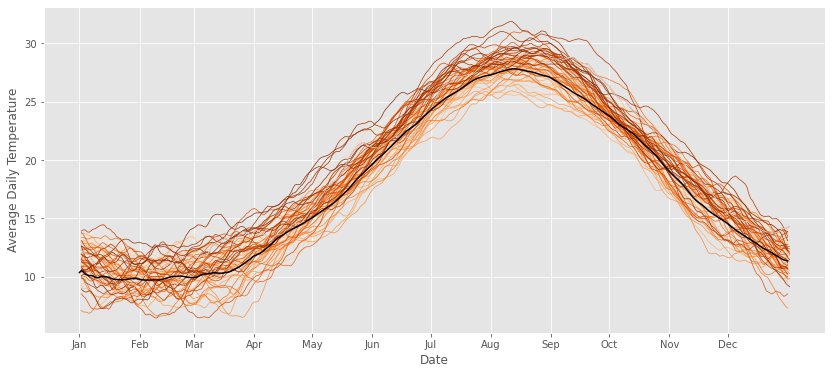

In [382]:
plt.figure(figsize=(14, 6))
first_day_of_month = np.array([0,31,59,90,120,151,181,212,243,273,304,334]) # First day of each month
my_xticks = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(first_day_of_month, my_xticks)

for i in range(1955,2021):
    
    if (q3.DATE.loc[q3.DATE.dt.year==i].value_counts().sum())==365:
        l=range(1,366)
        
    else:
        l=range(1,367)
        
    sns.lineplot(x=l, y=q3.roll2.loc[q3.DATE.dt.year==i], linewidth = 0.7)


p = sns.lineplot(x=l ,y=q3.roll2.loc[q3.DATE.dt.year==i], linewidth= 0.7)
p.set(xlabel="Date", ylabel = "Average Daily Temperature")
plt.plot(rollbase.values, color='black')
plt.savefig("PLOT2.png",format='png',dpi=110) #to save the plot as png

## Interpretation

In the above graph we can see that as the years go by (the darker the color the more recent the year) the mean average temperature of the year is flactuating in higher values. In addition, we can see that the biggest difference between mean average temperatures is during March with a great interval between mean averages.The month with the smallest interval between mean averages is October. Moreover, the baseline from 1974 to 1999 (black curve) is flactuating in slightly lower levels than the majority of the other years.

# Question 4: Extreme Temperature Events

### Create a new data frame `q4` which contains only date from 1974 to 1999 (DATE) and average temperature (TAVG).

In [383]:
q4 = weather.loc[:,['DATE','TAVG']]
q4 = q4.loc[(q4.DATE.dt.year>=1974) & (q4.DATE.dt.year<=1999)]
q4

,DATE,TAVG
6940,1974-01-01,11.7
6941,1974-01-02,13.9
6942,1974-01-03,12.2
6943,1974-01-04,10.6
6944,1974-01-05,9.4
...,...,...
16431,1999-12-27,15.6
16432,1999-12-28,16.7
16433,1999-12-29,15.0
16434,1999-12-30,13.3


### Grouped by month and day.

In [384]:
groupedq4 = q4.groupby([q4.DATE.dt.month, q4.DATE.dt.day])
groupedq4.TAVG.mean()

DATE  DATE
1     1       10.369231
      2       10.696154
      3       10.211538
      4        9.596154
      5        9.957692
                ...    
12    27       9.807692
      28      10.215385
      29      10.784615
      30      11.346154
      31      10.980769
Name: TAVG, Length: 366, dtype: float64

### Here we have two gropued variables
* `groupedq4` which contains average temperature grouped by month and day.
* `groupedq4_no_leap` which contains the same as `groupedq4` except the date 2/29 (date included in leap years)

In [385]:
groupedq4_no_leap = groupedq4.TAVG.mean()
groupedq4_no_leap[2,29] = None
groupedq4_no_leap = groupedq4_no_leap.dropna()
groupedq4_no_leap #groupedq4_no_leap does not contains 29/2 in dates

DATE  DATE
1     1       10.369231
      2       10.696154
      3       10.211538
      4        9.596154
      5        9.957692
                ...    
12    27       9.807692
      28      10.215385
      29      10.784615
      30      11.346154
      31      10.980769
Name: TAVG, Length: 365, dtype: float64

### Create `q4_all` data frame which contains date (DATE) and average temperature (TAVG) for years 1955 - 2020.

In [386]:
q4_all = weather.loc[:,['DATE','TAVG']]

In [387]:
mylist=[]

for i in range(1955,2021):
    
    if len(q4_all.loc[q4_all.DATE.dt.year==i]) == 366:
        cnt1 = len(q4_all.TAVG.loc[(q4_all.DATE.dt.year==i) & (q4_all.TAVG.loc[(q4_all.DATE.dt.year==i)] > groupedq4.TAVG.mean().values + groupedq4.TAVG.mean().values*0.1)])
        obs = (366 - q4_all.TAVG.loc[(q4_all.DATE.dt.year==i)].isna().sum())
        if obs == 0:
            cnt2 = 0
        else:
            cnt2 = cnt1/obs
    else:
        cnt1 = len(q4_all.TAVG.loc[(q4_all.DATE.dt.year==i) & (q4_all.TAVG.loc[(q4_all.DATE.dt.year==i)] > groupedq4_no_leap.values + groupedq4_no_leap.values*0.1)])
        obs = (365 - q4_all.TAVG.loc[(q4_all.DATE.dt.year==i)].isna().sum())
        if obs == 0:
            cnt2 = 0
        else:
            cnt2 = cnt1/obs
    
    mylist.append(cnt2)

# (obs) I substract the number of NAs found on TAVG, from 365 or 366 (based on the year), in order to divide the number of extreme heat condition days with the actual number of observations we had in dataset per year.
# mylist contains the number of days which extreme heat conditions had observed for every year.

###  Create data frame `b4` which will help me to calculate the baseline.

In [388]:
b4 = weather.loc[(weather.DATE.dt.year >= 1974) & (weather.DATE.dt.year<=1999)]
b4

,DATE,PRCP,TAVG,TMAX,TMIN
6940,1974-01-01,0.00,11.7,12.8,10.0
6941,1974-01-02,0.00,13.9,15.6,11.1
6942,1974-01-03,9.91,12.2,16.1,10.6
6943,1974-01-04,0.00,10.6,12.8,8.3
6944,1974-01-05,0.00,9.4,11.1,8.3
...,...,...,...,...,...
16431,1999-12-27,0.00,15.6,18.9,10.6
16432,1999-12-28,0.00,16.7,20.0,12.8
16433,1999-12-29,0.00,15.0,18.3,14.4
16434,1999-12-30,0.00,13.3,16.7,8.3


In [389]:
s=0
for i in range(1974,2000):
    if len(b4.loc[b4.DATE.dt.year==i]) == 366:
        cnt3 = b4.TAVG.loc[(b4.DATE.dt.year==i) & (b4.TAVG.loc[(b4.DATE.dt.year==i)] > groupedq4.TAVG.mean().values + groupedq4.TAVG.mean().values*0.1)]
   
    else:
        cnt3 = b4.TAVG.loc[(b4.DATE.dt.year==i) & (b4.TAVG.loc[(b4.DATE.dt.year==i)] > groupedq4_no_leap.values + groupedq4_no_leap.values*0.1)]
    
    s = s + len(cnt3)


# s is the number of days from 1974 to 1999 which extreme heat conditions had observed.

In [390]:
baseline4 = s/len(b4)
baseline4

0.2485256950294861

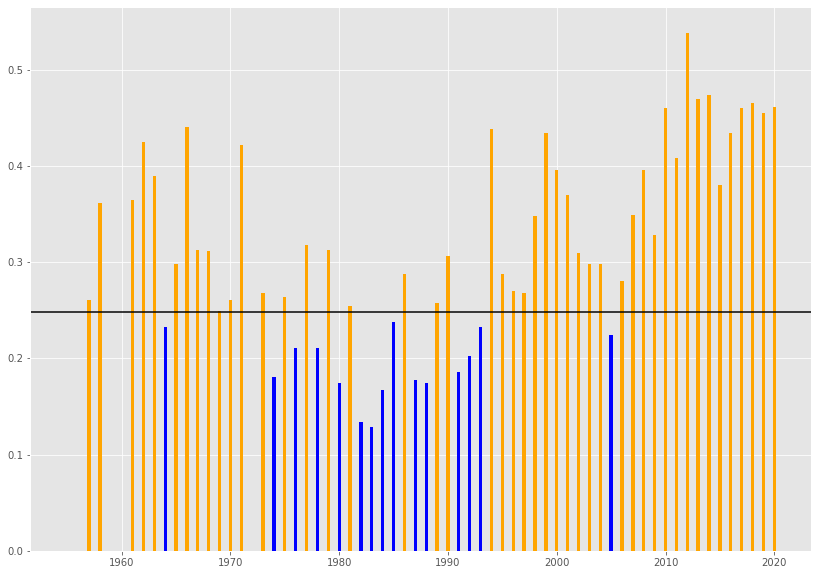

In [391]:
mylist2 = np.array(mylist) #convert list to an array

plt.figure(figsize=(14, 10))
plt.bar(x_all[mylist2<baseline4].index, mylist2[mylist2<baseline4], bottom=0, width=0.3, color='blue')
plt.bar(x_all[mylist2>baseline4].index, mylist2[mylist2>baseline4], bottom=0, width=0.3, color='orange')
plt.axhline(y=baseline4, color='black', linestyle='-')
plt.savefig("PLOT3.png",format='png',dpi=85)

# Intepretation

From the above figure we can see that 2012 was the year with the most extreme heat conditions observed. Moreover, there are only 15 years below the 1974-1999 baseline with the rest years being above the baseline. We should also mention that from 1994 and then the frequency of that type of extreme conditions being above the baseline is higher compared to the previous years. The only exception is in 2005 which it was the only year after 1994 which is below the baseline.

# Question 5: Precipitation
### Create a new data frame `q5` which contains only DATE and informations about rain (PRCP).

In [392]:
q5 = weather.loc[:,['DATE', 'PRCP']]
q5

,DATE,PRCP
0,1955-01-01,0.00
1,1955-01-02,2.03
2,1955-01-03,0.00
3,1955-01-04,0.00
4,1955-01-05,0.00
...,...,...
24102,2020-12-27,0.00
24103,2020-12-28,6.60
24104,2020-12-29,0.00
24105,2020-12-30,0.00


### I will group my new data frame by year.

In [393]:
yearly5 = q5.groupby(q5.DATE.dt.year)
len(yearly5)

66

In [394]:
x5 = yearly5.size()
x5.index

Int64Index([1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
            1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
            1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
            1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='DATE')

### Made a new data frame `y5` wich contains the ratio of total PRCP to the number of rains occured per year.

In [395]:
list5=[]
for key, group in yearly5:
    list5.append(group.PRCP.loc[group.PRCP > 0].sum() / group.PRCP.loc[group.PRCP > 0].count())

In [396]:
y5 = pd.DataFrame(list5, columns = ['RATIO'])
y5.RATIO

0     8.169552
1     5.628200
2     4.582879
3     5.387692
4     3.751754
        ...   
61    6.221905
62    6.341250
63    6.916727
64    9.831552
65    5.533947
Name: RATIO, Length: 66, dtype: float64

### Calculate rolling average

In [397]:
roll5 = y5.rolling(10, min_periods=1).mean()

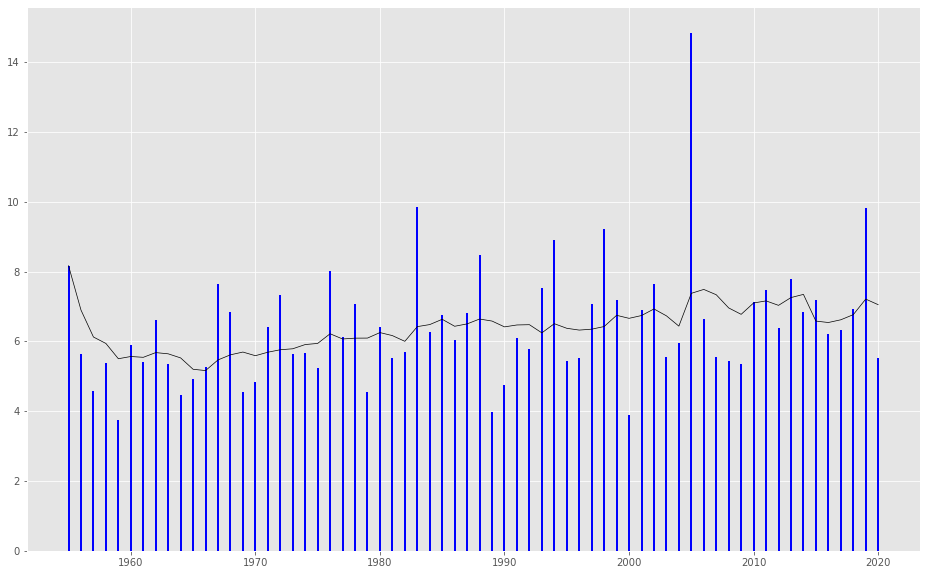

In [398]:
plt.figure(figsize=(16, 10))
plt.bar(x5.index, list5, width=0.16, color='blue')
plt.plot(x5.index, roll5, linewidth=0.7 ,color='black')
plt.savefig("PLOT4.png",format='png',dpi=85)

# Interpretation

From the above graph we can see that the year in which we are getting rain in more concentration is 2005. The year with the lowest rain concentration is 1959. We can see a steady increase from mid 60's to mid 80's. We also observe that during 10's the rain concentration was fluctuated in higher values on average than in the previous decades.